In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_netflix = pd.read_csv('/Users/pooja/MSDS/EDA/Project_work/Combined_titles.csv')
df_netflix.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix


In [5]:
df = df_netflix.copy()

In [6]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR', 'NOT RATED', '2 Seasons', '93 min', '4 Seasons',
       '136 min', '91 min', '85 min', '98 min', '89 min', '94 min',
       '86 min', '3 Seasons', '121 min', '88 min', '101 min', '1 Season',
       '83 min', '100 min', '95 min', '92 min', '96 min', '109 min',
       '99 min', '75 min', '87 min', '67 min', '104 min', '107 min',
       '103 min', '105 min', '119 min', '114 min', '82 min', '90 min',
       '130 min', '110 min', '80 min', '6 Seasons', '97 min', '111 min',
       '81 min', '49 min', '45 min', '41 min', '73 min', '40 min',
       '36 min', '39 min', '34 min', '47 min', '65 min', '37 min',
       '78 min', '102 min', '129 min', '115 min', '112 min', '61 min',
       '106 min', '76 min', '77 min', '79 min', '157 min', '28 min',
       '64 min', '7 min', '5 min', '6 min', '127 min', '142 min',
       '108 min', '57

In [7]:
#cleaning rating column
ratings = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
          'TV-G', 'G', 'NC-17', 'NR', np.nan, 'TV-Y7-FV', 'UR', 'NOT RATED']
for i in range(len(df['rating'])):
   if df.loc[i, 'rating'] not in ratings:
       df.loc[i, 'rating'], df.loc[i, 'duration'] = df.loc[i, 'duration'], df.loc[i, 'rating']

In [8]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR', 'NOT RATED'],
      dtype=object)

q: do we need to clean country column? vs director? 

are we not counting movies/shows multiple times in the code below?

In [9]:
# def category_counter(categories, netflix_map=None):
#    categories = categories.str.split(", ")
#    hash_map = {"Missing": 0}
#    for category_list in categories:
#        if type(category_list) != list:
#            hash_map["Missing"] += 1
#            continue
#        for category in category_list:
#            curr_category = category
#            if netflix_map and category in netflix_map:
#                curr_category = netflix_map[category]
#            if curr_category not in hash_map:
#                hash_map[curr_category] = 0
#            hash_map[curr_category] += 1
#    return dict(sorted(hash_map.items(), key=lambda x: x[1], reverse=True))
# netflix_map = {"Standup": "Standup Comedy"}
# category_counter(test, netflix_map)

In [10]:
df['type'].unique(), df['Platform'].unique()

(array(['Movie', 'TV Show'], dtype=object),
 array(['Netflix', 'Hulu'], dtype=object))

In [11]:
df_netflix.shape, df_netflix['director'].isnull().sum()/11880*100, df_netflix['cast'].isnull().sum()/11880*100

((11880, 13), 48.013468013468014, 32.81144781144781)

In [12]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix


In [13]:
average_directors2= df.dropna(subset=['director']).copy()
average_directors1 = average_directors2['director']
average_directors = average_directors1.value_counts().mean()
average_directors

1.3630545133524608

In [14]:
# Drop rows where the 'director' column is NaN
df_clean = df.dropna(subset=['director']).copy()

#converting to strings to handle error
df_clean['listed_in'] = df_clean['listed_in'].astype(str)
df_clean['rating'] = df_clean['rating'].astype(str)

#getting data required in one df
summary_df = df_clean.groupby('director').agg(
    num_tv_shows=('type', lambda x: (x == 'TV Show').sum()),
    num_movies=('type', lambda x: (x == 'Movie').sum()),
    country=('country', 'first'),
    genre_counts=('listed_in', lambda x: pd.Series(x.str.split(', ').explode()).value_counts().to_dict()),
    #genre_counts=('listed_in', lambda x: pd.Series(x.str.split(', ').str[0]).value_counts().to_dict()),
    ratings=('rating', lambda x: pd.Series(x.str.split(', ').str[0]).value_counts().to_dict()),
    platform=('Platform', 'first')
).reset_index()


summary_df

,director,num_tv_shows,num_movies,country,genre_counts,ratings,platform
0,A. L. Vijay,0,2,India,"{'Comedies': 2, 'International Movies': 2, 'Dr...",{'TV-14': 2},Netflix
1,A. Raajdheep,0,1,India,"{'Dramas': 1, 'International Movies': 1}",{'TV-14': 1},Netflix
2,A. Salaam,0,1,India,"{'Action & Adventure': 1, 'International Movie...",{'TV-14': 1},Netflix
3,A.R. Murugadoss,0,2,India,"{'Action & Adventure': 2, 'International Movie...","{'TV-MA': 1, 'TV-14': 1}",Netflix
4,Aadish Keluskar,0,1,India,"{'Dramas': 1, 'Independent Movies': 1, 'Intern...",{'TV-MA': 1},Netflix
...,...,...,...,...,...,...,...
4526,Çagan Irmak,0,1,Turkey,"{'Dramas': 1, 'International Movies': 1}",{'TV-14': 1},Netflix
4527,Ísold Uggadóttir,0,1,"Iceland, Sweden, Belgium","{'Dramas': 1, 'Independent Movies': 1, 'Intern...",{'TV-14': 1},Netflix
4528,Óskar Thór Axelsson,0,1,Iceland,"{'Horror Movies': 1, 'International Movies': 1}",{'TV-MA': 1},Netflix
4529,Ömer Faruk Sorak,0,2,Turkey,"{'International Movies': 2, 'Action & Adventur...",{'TV-MA': 2},Netflix


In [15]:
summary_df['total'] = summary_df['num_tv_shows'] + summary_df['num_movies']
sorted_directors = summary_df.sort_values(by='total', ascending=False).head(10)

In [16]:
sorted_directors = pd.DataFrame(sorted_directors)
sorted_directors

,director,num_tv_shows,num_movies,country,genre_counts,ratings,platform,total
3395,Rajiv Chilaka,0,19,India,"{'Children & Family Movies': 19, 'Sports Movie...","{'TV-Y7': 17, 'TV-Y': 2}",Netflix,19
3446,"Raúl Campos, Jan Suter",0,18,Mexico,{'Stand-Up Comedy': 18},"{'TV-MA': 17, 'TV-14': 1}",Netflix,18
4049,Suhas Kadav,0,16,India,"{'Children & Family Movies': 16, 'Comedies': 8...","{'TV-Y7': 12, 'TV-Y': 3, 'TV-Y7-FV': 1}",Netflix,16
2601,Marcus Raboy,1,15,United States,"{'Stand-Up Comedy': 15, 'Stand-Up Comedy & Tal...","{'TV-MA': 13, 'TV-14': 3}",Netflix,16
1793,Jay Karas,0,14,United States,"{'Stand-Up Comedy': 13, 'Children & Family Mov...","{'TV-MA': 10, 'TV-14': 3, 'TV-G': 1}",Netflix,14
685,Cathy Garcia-Molina,0,13,Philippines,"{'International Movies': 13, 'Dramas': 9, 'Rom...","{'TV-14': 7, 'TV-G': 2, 'TV-MA': 2, 'TV-PG': 2}",Netflix,13
1790,Jay Chapman,0,12,United States,"{'Stand-Up Comedy': 12, 'Music & Musicals': 1}","{'TV-MA': 10, 'TV-14': 1, 'NR': 1}",Netflix,12
4483,Youssef Chahine,0,12,Egypt,"{'Dramas': 12, 'International Movies': 10, 'Cl...","{'TV-MA': 7, 'TV-14': 5}",Netflix,12
2674,Martin Scorsese,0,12,United States,"{'Dramas': 9, 'Classic Movies': 5, 'Thrillers'...","{'R': 8, 'TV-MA': 2, 'PG': 2}",Netflix,12
4023,Steven Spielberg,0,11,United States,"{'Dramas': 6, 'Children & Family Movies': 6, '...","{'PG': 5, 'PG-13': 5, 'R': 1}",Netflix,11


In [17]:
# Convert genre_counts to a DataFrame
genre_df = sorted_directors['genre_counts'].apply(pd.Series).fillna(0).astype(int)

# Sum the genre counts across all directors
total_genre_counts = genre_df.sum().reset_index()
total_genre_counts.columns = ['Genre', 'Total Count']

genres = total_genre_counts.sort_values(by='Total Count', ascending=False)
# genres = genres.reset_index(drop=True)
# genres
# combined_genres = genres.iloc[-10:].sum()
# combined_genres, genres

In [18]:
# Convert ratings to a DataFrame
rating_df = sorted_directors['ratings'].apply(pd.Series).fillna(0).astype(int)

# Sum the genre counts across all directors
total_rating_counts = rating_df.sum().reset_index()
total_rating_counts.columns = ['Ratings', 'Total Count']

ratings = total_rating_counts.sort_values(by='Total Count', ascending=False)
ratings

,Ratings,Total Count
2,TV-MA,61
0,TV-Y7,29
3,TV-14,20
8,R,9
9,PG,7
1,TV-Y,5
10,PG-13,5
5,TV-G,3
6,TV-PG,2
4,TV-Y7-FV,1


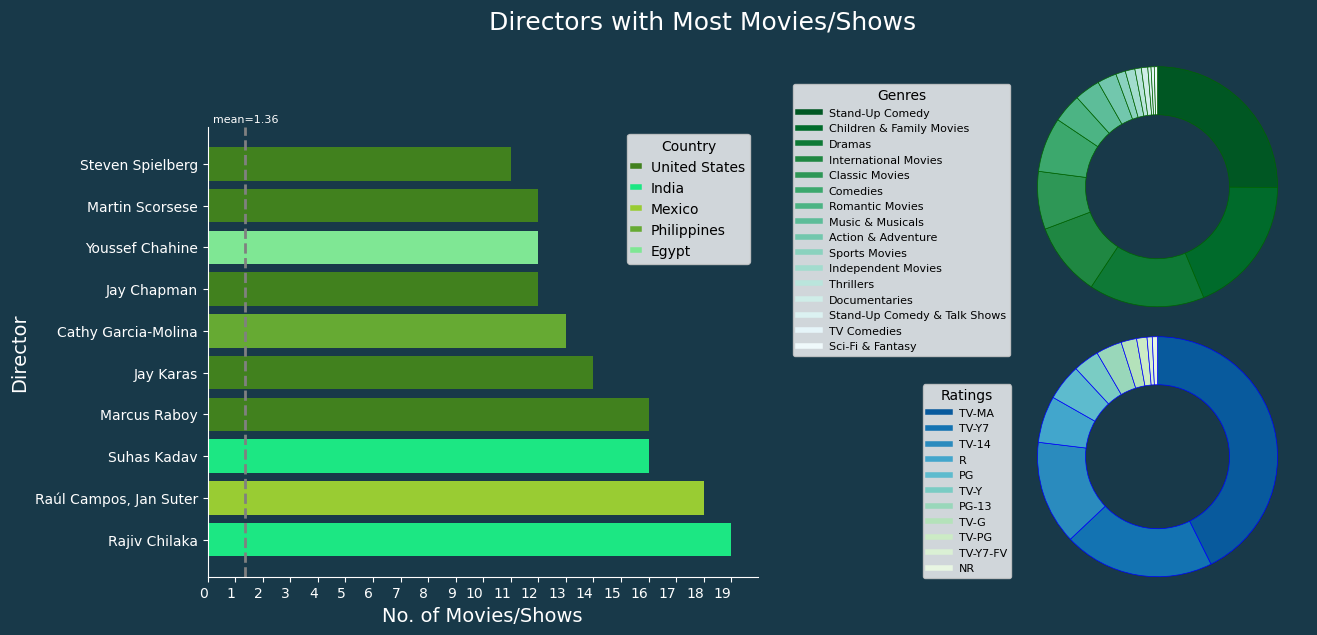

In [19]:
fig = plt.figure(figsize=(10,6))

#countries:
color_mapping = {'United States': '#41811e', 'India': '#1ce783', 'Mexico': '#99cc33', 'Philippines':'#66aa33', 'Egypt': '#7fe794'}
bar_colors = sorted_directors['country'].map(color_mapping).fillna('grey')

#drawing plot
ax1 = fig.add_axes([0.1, 0.2, 0.55, 0.75]) 
ax1.barh(sorted_directors['director'], sorted_directors['total'], color=bar_colors)

#adding a mean value:
ax1.axvline(x=average_directors, color='grey', linestyle='--', linewidth=2, label=f'Mean: {average_directors:.2f}')

#setting labels:
ax1.set_ylabel('Director', size=14, color='white', x=-0.1, y=0.5)
ax1.set_xlabel('No. of Movies/Shows', size=14, color='white')
ax1.set_title('Directors with Most Movies/Shows', size=18, x=0.9, y=1.2, color='white')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')

#adjusting ticks:
plt.xticks(ticks=range(0, 20, 1), ha='right', size=8, color='white')
plt.yticks(size=8, color='white')
plt.tick_params(axis='y', labelsize=10, labelcolor='white', color='white')
plt.tick_params(axis='x', labelsize=10, labelcolor='white', color='white')

#legend:
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in color_mapping.values()]
labels = color_mapping.keys()

# Adjust legend size and position
plt.legend(handles, labels, title='Country', bbox_to_anchor=(0.75, 1), loc='upper left',
           fontsize=10, title_fontsize=10, handlelength=0.5, handleheight=0.8)


# Adding donut charts (genre and rating)
# Position of the donut charts
donut1_position = [0.8, 0.6, 0.5, 0.5]  # [left, bottom, width, height]
donut2_position = [0.8, 0.15, 0.5, 0.5]

# Donut chart for genres
ax2_genre = fig.add_axes(donut1_position)
genre_labels = genres['Genre'].tolist()
#genre_colors = plt.cm.Greens(range(255, 0, -256 // len(genre_labels)))
genre_colors = sns.color_palette("BuGn", len(genre_labels))
genre_colors = genre_colors[::-1]
ax2_genre.pie(genres['Total Count'], startangle=90, counterclock=False, wedgeprops={'width': 0.4, 'edgecolor':'darkgreen', 'lw':0.5}, colors=genre_colors)

# Donut chart for ratings
ax3_rating = fig.add_axes(donut2_position)
rating_labels = ratings['Ratings'].tolist()
#rating_colors = plt.cm.Blues(range(255, 0, -256 // len(rating_labels)))
rating_colors = sns.color_palette("GnBu", len(rating_labels))
rating_colors = rating_colors[::-1]
ax3_rating.pie(ratings['Total Count'], startangle=90, counterclock=False, wedgeprops={'width': 0.4, 'edgecolor':'blue', 'lw':0.50}, colors=rating_colors)

# Legends for the donut charts

fig.legend(handles=[plt.Line2D([0], [0], color=genre_colors[i], lw=4) for i in range(len(genre_labels))],
           labels=genre_labels, loc='upper left', bbox_to_anchor=(0.68, 1.03), fontsize=8, title='Genres')
fig.legend(handles=[plt.Line2D([0], [0], color=rating_colors[i], lw=4) for i in range(len(rating_labels))],
           labels=rating_labels, loc='upper left', bbox_to_anchor=(0.81, 0.53), fontsize=8, title='Ratings')

fig.patch.set_facecolor('#183949')
ax1.set_facecolor('#183949')
ax1.text(1.4,10, 'mean=1.36', ha='center', color='white', fontsize=8)


plt.savefig("Top_10_directors.png", bbox_inches="tight", pad_inches=0)


#show plot
plt.show()


Average number of seasons/length:


In [20]:
df_shows = df_netflix[df_netflix['type'] == 'TV Show']
df_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...,Hulu
11876,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...,Hulu
11877,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...,Hulu
11878,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,Hulu


In [21]:
df_shows.isnull().sum()

show_id            0
type               0
title              0
director        4035
cast            1939
country         1021
date_added        38
release_year       0
rating           232
duration           0
listed_in          0
description        1
Platform           0
dtype: int64

no misiing values in shows and duration

In [22]:
df_shows['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons', '23 Seasons', '16 Seasons', '20 Seasons',
       '14 Seasons', '29 Seasons', '19 Seasons', '30 Seasons',
       '22 Seasons', '25 Seasons', '34 Seasons', '26 Seasons'],
      dtype=object)

/var/folders/98/8kv7cjxs5fx0f14r32z6xw6h0000gn/T/ipykernel_31110/3290391350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['seasons'] = df_shows['duration'].str.extract(r'(\d+)').astype(float)


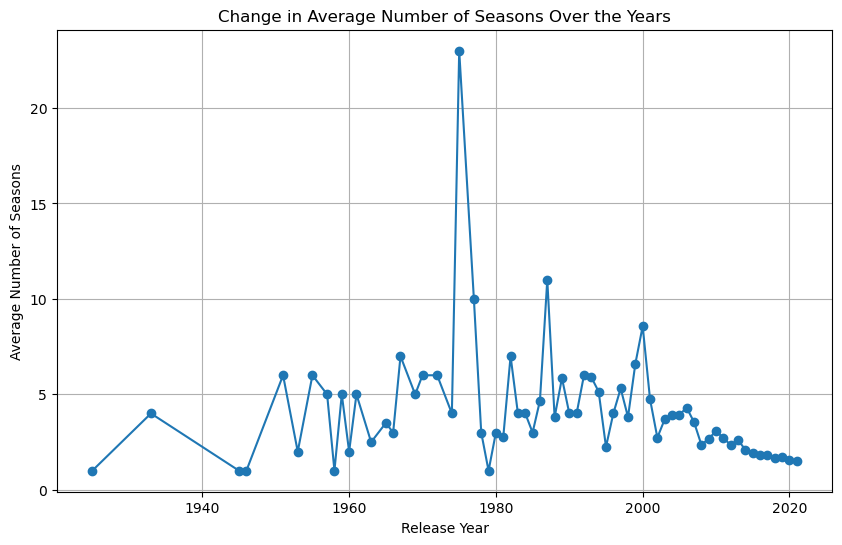

In [23]:
# Extracting the number of seasons from the duration column
df_shows['seasons'] = df_shows['duration'].str.extract(r'(\d+)').astype(float)


# Group by release_year and calculate the average number of seasons
avg_seasons_per_year = df_shows.groupby('release_year')['seasons'].mean().copy()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(avg_seasons_per_year.index, avg_seasons_per_year.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Average Number of Seasons')
plt.title('Change in Average Number of Seasons Over the Years')
plt.grid(True)
plt.show()


In [24]:
df_shows['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


/var/folders/98/8kv7cjxs5fx0f14r32z6xw6h0000gn/T/ipykernel_31110/2286707011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [25]:
df_shows_clean = df_shows[(df_shows['title'] != 'Saturday Night Live')]
df_shows_clean.shape, df_shows.shape

((4264, 14), (4265, 14))

In [26]:
average_seasons_by_decade_3 = df_shows_clean.groupby('release_year')['seasons'].mean()
a =average_seasons_by_decade_3
c = a.reset_index()
average_seasons_per_year = c[c['release_year'] > 2010] # getting data just for years after 2015
average_seasons_per_year

,release_year,seasons
54,2011,2.706522
55,2012,2.348485
56,2013,2.602837
57,2014,2.094118
58,2015,1.913534
59,2016,1.832353
60,2017,1.822281
61,2018,1.679513
62,2019,1.707531
63,2020,1.584327


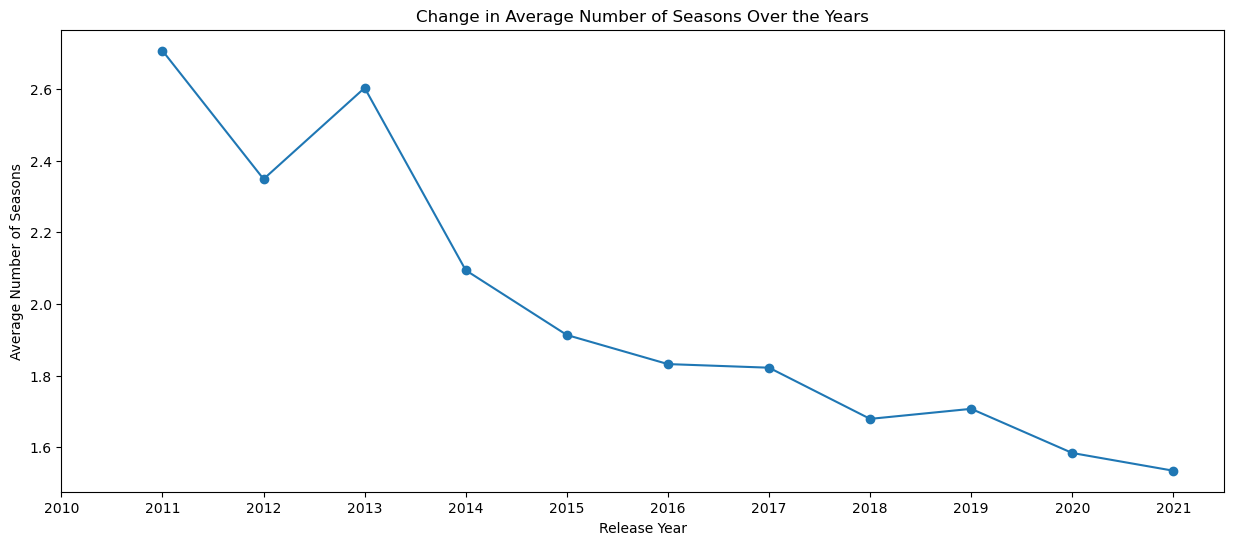

In [27]:
# Plotting the data
plt.figure(figsize=(15, 6))
plt.plot(average_seasons_per_year['release_year'], average_seasons_per_year['seasons'], marker='o')
plt.xlabel('Release Year')
plt.ylabel('Average Number of Seasons')
plt.title('Change in Average Number of Seasons Over the Years')
plt.xticks(ticks=range(2010,2022,1))

plt.show()

In [28]:
average_seasons_by_decade_3.values.shape

(65,)

In [29]:
df_movies_raw = df_netflix[df_netflix['type'] == 'Movie']
df_movies_raw

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Netflix
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Netflix
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Netflix
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11762,s2956,Movie,Getting On,NaN,NaN,United Kingdom,"January 7, 2014",2009,3 Seasons,NaN,"Comedy, International, Sitcom",Care for the elderly is the least glamorous ar...,Hulu
11765,s2959,Movie,(Sub) Ninja Scroll,NaN,NaN,Japan,"December 15, 2013",1993,93 min,NaN,"Action, Adult Animation, Adventure",When Jubei saves a young ninja woman from the ...,Hulu
11766,s2960,Movie,Packed to the Rafters,NaN,NaN,Australia,"December 3, 2013",2008,6 Seasons,NaN,"Comedy, Drama, International",Packed to the Rafters is an Australian family-...,Hulu
11789,s2983,Movie,(Sub) Legend of Heroes: Trails in the Sky,NaN,NaN,NaN,"August 31, 2013",2011,PG-13,84 min,"Anime, International, Science Fiction","Ten years ago, an invasion by the Erebonians a...",Hulu


In [30]:
# df_movies_raw['duration'].isnull().sum()
df_movies_raw1 = df_movies_raw.dropna(subset=['duration'])

df_movies_raw1['duration'].isnull().sum()
df_movies_raw1.shape, df_movies_raw.shape

((7133, 13), (7615, 13))

In [31]:
df_movies = df_movies_raw1[df_movies_raw1['release_year']!= 1923]
bins = range(1900, 2040, 10)
labels = [f'{year}-{year + 9}' for year in bins[:-1]]

df_movies['decade'] = pd.cut(df_movies['release_year'], bins=bins, labels=labels, right=False)
# df_movies[df_movies['decade'] == '1920-1929']
df_movies.shape

/var/folders/98/8kv7cjxs5fx0f14r32z6xw6h0000gn/T/ipykernel_31110/2773946589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['decade'] = pd.cut(df_movies['release_year'], bins=bins, labels=labels, right=False)


(7132, 14)

/var/folders/98/8kv7cjxs5fx0f14r32z6xw6h0000gn/T/ipykernel_31110/1688611965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['movies_time'] = df_movies['duration'].str.extract(r'(\d+)').astype(float)


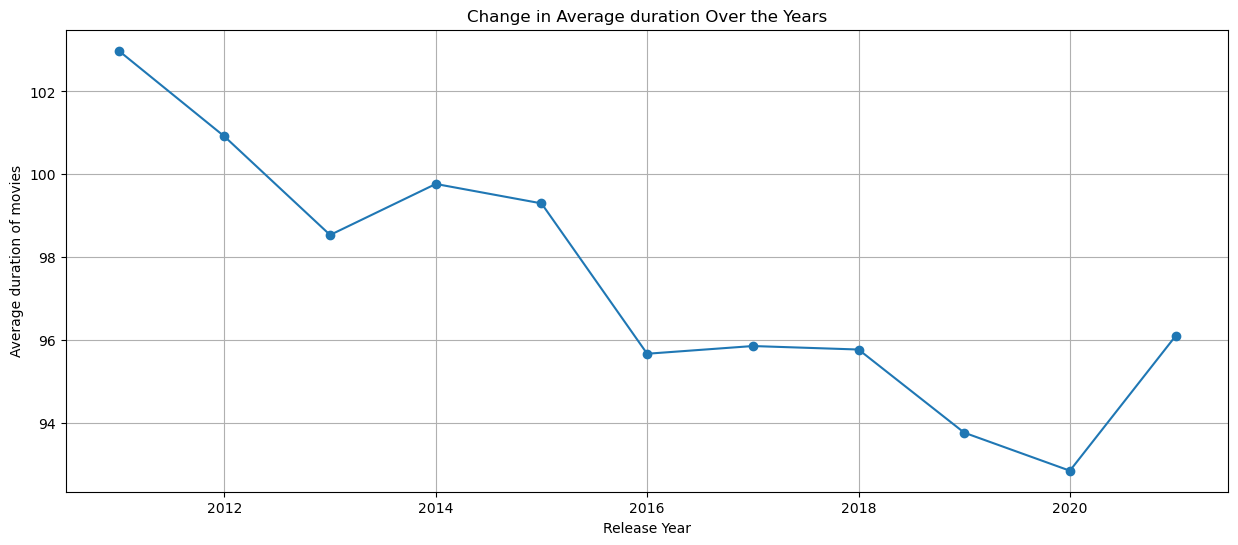

In [32]:
# Extracting the number of movies_time from the duration column
df_movies['movies_time'] = df_movies['duration'].str.extract(r'(\d+)').astype(float)


# Group by release_year and calculate the average number of movies_time
avg_movie = df_movies.groupby('release_year')['movies_time'].mean()
x = avg_movie.reset_index()
avg_movies_per_year = x[x['release_year'] > 2010]
avg_movies_per_year

# Plotting the data
plt.figure(figsize=(15, 6))
plt.plot(avg_movies_per_year['release_year'], avg_movies_per_year['movies_time'], marker='o')
plt.xlabel('Release Year')
plt.ylabel('Average duration of movies')
plt.title('Change in Average duration Over the Years')
plt.grid(True)
plt.show()

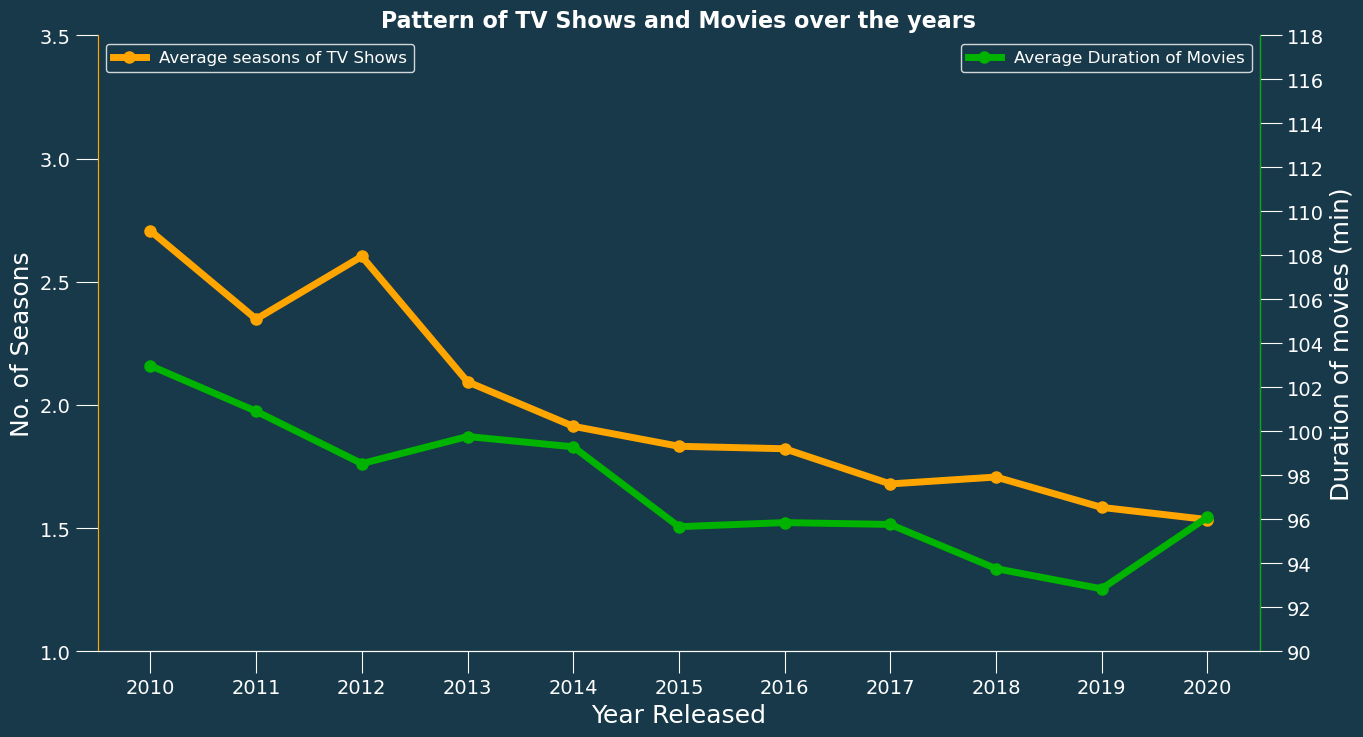

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
x = range(2010,2021,1)
y1 = average_seasons_per_year['seasons']  # First data set
y2 = avg_movies_per_year['movies_time']  # Second data set

# Create a figure and the first axis
fig, ax1 = plt.subplots(figsize=(15,8))

#setting background color:
fig.patch.set_facecolor('#183949')
ax1.set_facecolor('#183949')  


# Plot the first data set (y1) on the primary y-axis
ax1.plot(x, y1, color='orange', label='Average seasons of TV Shows', marker='o', ms=8, lw=5)
ax1.set_xlabel('Year Released', size=18, color='white')
ax1.set_ylabel('No. of Seasons', size=18, color='white')
ax1.set_xticks(np.arange(2010,2021,1))
ax1.set_yticks(np.arange(1,4,0.5))
ax1.tick_params(axis='y', size=16, labelsize=14, labelcolor='white', color='white')
ax1.tick_params(axis='x', size=16,labelsize=14, labelcolor='white', color='white')


ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.spines['left'].set_color('orange')
ax1.spines['top'].set_visible(False)



# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.set_facecolor('white')

# Plot the second data set (y2) on the secondary y-axis

ax2.plot(x, y2, color='#00b300', label='Average Duration of Movies', marker='o', ms=8, lw=5)
ax2.set_yticks(np.arange(90,120,2))
ax2.set_ylabel('Duration of movies (min)', size=18, color='white')
ax2.tick_params(axis='y', size=16, labelsize=14, labelcolor='white', color='white')

# Set the second axis spines color to white
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('#00b300')
ax2.spines['left'].set_color('orange')
ax2.spines['top'].set_visible(False)
# Add a title
plt.title('Pattern of TV Shows and Movies over the years', weight='bold',size=16, color='white')

# Add legends
legend1 = ax1.legend(loc='upper left', fontsize=12)
legend2 = ax2.legend(loc='upper right', fontsize=12)

# Customizing legends' appearance
plt.setp(legend1.get_texts(), color='white')
plt.setp(legend2.get_texts(), color='white')
plt.xticks(fontsize=16)

# Set the background color of the legends]
legend1.get_frame().set_facecolor('#183949') 
legend2.get_frame().set_facecolor('#183949')

# Optionally, set the edge color of the legend box if needed
legend1.get_frame().set_edgecolor('white')
legend2.get_frame().set_edgecolor('white')


plt.savefig("Pattern of shows & movies.png", bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()


In [34]:
df_netflix.head(3)
missing = df_netflix.isnull().sum()
missing.sum()
df_netflix.size, missing.sum()
missing.sum() / df_netflix.size * 100

8.374773374773376

In [35]:
df_netflix.isnull().sum() / len(df_netflix) *100

show_id          0.000000
type             0.000000
title            0.000000
director        48.013468
cast            32.811448
country         19.225589
date_added       0.319865
release_year     0.000000
rating           4.410774
duration         4.057239
listed_in        0.000000
description      0.033670
Platform         0.000000
dtype: float64

In [36]:
#percentage of missing values for each column
missing_percentages = df_netflix.isna().mean() * 100
missing_percentages = missing_percentages[missing_percentages > 0]
missing_percentages = missing_percentages.sort_values(ascending=False)
combined = missing_percentages.iloc[-2:].sum()
combined_label = f'{missing_percentages.index[-2]} + {missing_percentages.index[-1]}'

missing_percentages = missing_percentages[:-2]
missing_percentages[combined_label] = combined
missing_percentages.index.str.upper()


Index(['DIRECTOR', 'CAST', 'COUNTRY', 'RATING', 'DURATION',
       'DATE_ADDED + DESCRIPTION'],
      dtype='object')

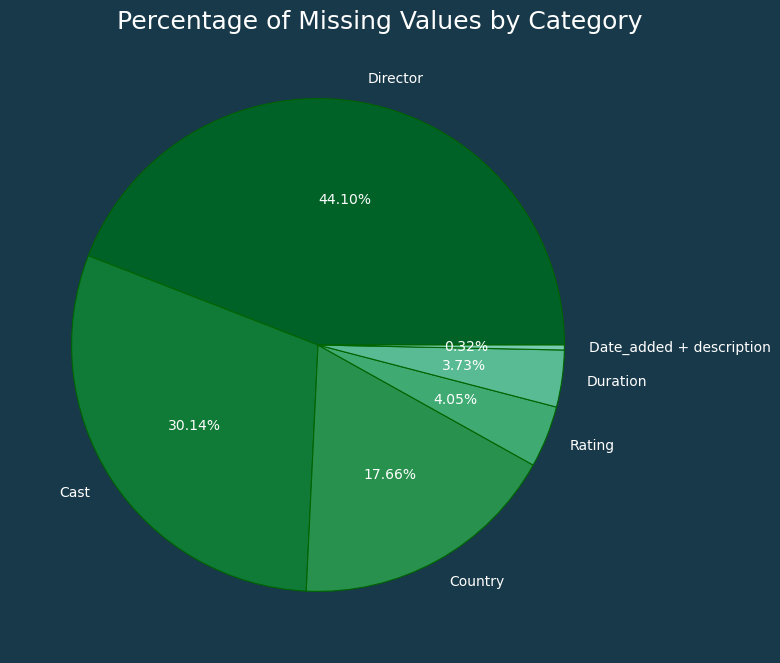

In [37]:
# colors = {'director':}
colors = sns.color_palette("BuGn", 10)[3:]
colors = colors[::-1]
#pie chart
fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(missing_percentages, labels=missing_percentages.index.str.capitalize(), autopct='%1.2f%%', colors=colors, textprops={'color':'white'}, wedgeprops={'edgecolor':'darkgreen', 'lw':0.8})

#title
ax.set_title('Percentage of Missing Values by Category', color='white', size=18, loc='center', x=0.6)

#facepatch
fig.patch.set_facecolor('#183949')
ax.set_facecolor('#183949')

plt.savefig("Percentage of Missing Values by Category", bbox_inches='tight', pad_inches=0)

plt.show()



In [38]:
df_year = df_netflix.copy()

In [39]:
missing = df_netflix.isnull()
missing*100
missing.sum().sum(), df_netflix.size

(12934, 154440)

In [50]:
bins = range(1900, 2040, 10)
labels = [f'{year}-{year + 9}' for year in bins[:-1]]

df_year['decade'] = pd.cut(df_year['release_year'], bins=bins, labels=labels, right=False)

In [49]:
missing_values_by_year = df_year.groupby('decade').apply(lambda x: x.isna().sum())
missing_by_year = missing_values_by_year.drop('decade', axis=1)
missing_by_year = missing_by_year.reset_index()
missing_by_years = missing_by_year.iloc[8:]
missing_by_years
# Calculate total missing values per decade
missing_by_years['total'] = missing_by_years[['director', 'cast', 'country', 'rating', 'date_added', 'duration']].sum(axis=1)

# Sort by total missing values
missing_by_years_sorted = missing_by_years.sort_values(by='total', ascending=False)
missing_by_years_sorted


/var/folders/98/8kv7cjxs5fx0f14r32z6xw6h0000gn/T/ipykernel_31110/1667041052.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_values_by_year = df_year.groupby('decade').apply(lambda x: x.isna().sum())
/var/folders/98/8kv7cjxs5fx0f14r32z6xw6h0000gn/T/ipykernel_31110/1667041052.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_year = df_year.groupby('decade').apply(lambda x: x.isna().sum())
/var/folders/98/8kv7cjxs5fx0f14r32z6xw6h0000gn/T/ipykernel_31110/1667041052.py:7: SettingWi

,decade,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform,total
11,2010-2019,0,0,0,3520,2341,1207,12,0,226,278,0,1,0,7584
12,2020-2029,0,0,0,1303,827,773,0,0,268,153,0,2,0,3324
10,2000-2009,0,0,0,545,428,180,15,0,18,23,0,1,0,1209
9,1990-1999,0,0,0,185,155,74,8,0,7,14,0,0,0,443
8,1980-1989,0,0,0,67,60,26,1,0,1,1,0,0,0,156


/var/folders/98/8kv7cjxs5fx0f14r32z6xw6h0000gn/T/ipykernel_31110/3097841777.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([str(abs(int(tick))) for tick in ax2.get_xticks()])  # Show positive numbers


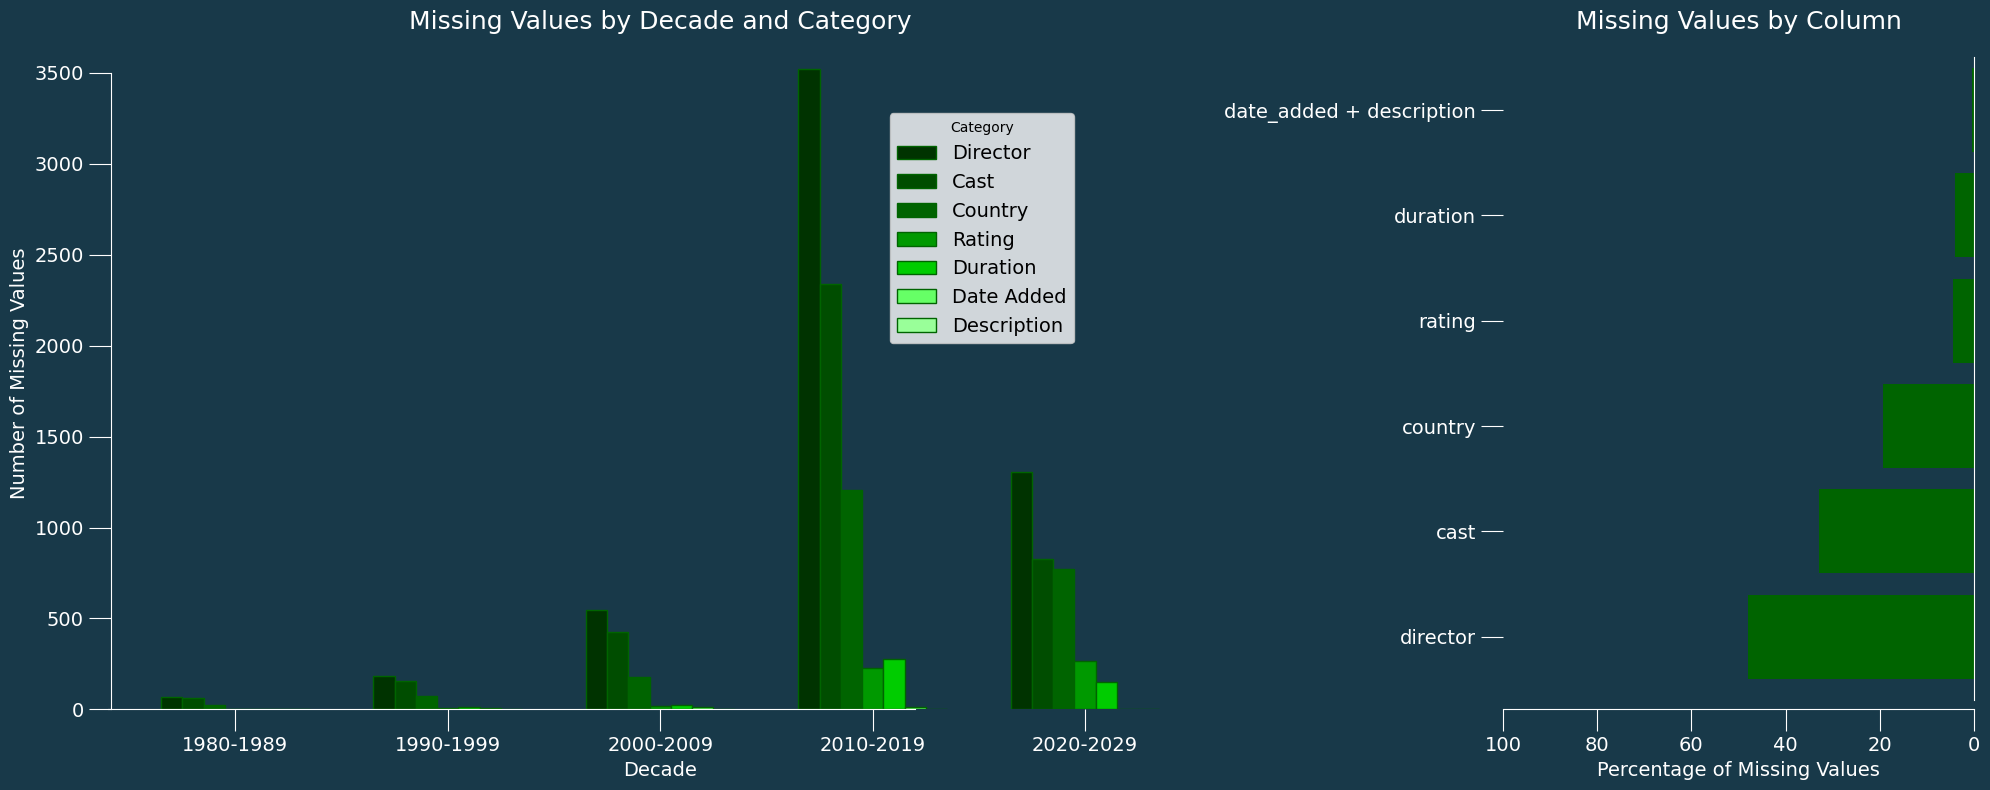

In [43]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

# Define x locations for the bars
x = range(len(missing_by_years['decade']))

# Define the width of each bar and space between groups
w = .10  # Width of bars

# Create the plot
fig = plt.figure(figsize=(20, 8))
gs = GridSpec(1, 2, width_ratios=[3.5,1.5])

# Set the overall face color of the figure
fig.patch.set_facecolor('#183949')

ax1 = fig.add_subplot(gs[0])
# Plot each column with a different color
ax1.bar([i - 3*w for i in x], missing_by_years['director'], width=w, color='#003300', label='Director', edgecolor='darkgreen')
ax1.bar([i - 2*w for i in x], missing_by_years['cast'], width=w, color='#004d00', label='Cast', edgecolor='darkgreen')
ax1.bar([i - w for i in x], missing_by_years['country'], width=w, color='#006400', label='Country', edgecolor='darkgreen')
ax1.bar(x, missing_by_years['rating'], width=w, color='#009900', label='Rating', edgecolor='darkgreen')
ax1.bar([i + w for i in x], missing_by_years['duration'], width=w, color='#00cc00', label='Duration', edgecolor='darkgreen')
ax1.bar([i + 2*w for i in x], missing_by_years['date_added'], width=w, color='#66ff66', label='Date Added', edgecolor='darkgreen')
ax1.bar([i + 3*w for i in x], missing_by_years['description'], width=w, color='#99ff99', label='Description', edgecolor='darkgreen')

# Customize the x-axis
ax1.set_xticks(x)
ax1.set_xticklabels(missing_by_years['decade'], color='white')  # Use decade labels from the data

# Add labels and title
ax1.set_xlabel('Decade', size=14, color='white')
ax1.set_ylabel('Number of Missing Values', size=14, color='white')
ax1.set_title('Missing Values by Decade and Category', size=18, color='white')
ax1.tick_params(axis='y', labelsize=14, labelcolor='white')
ax1.tick_params(axis='x', labelsize=14, labelcolor='white')

# Legend
ax1.legend(title='Category', bbox_to_anchor=(0.7, 0.53), fontsize=14)

# Set axis face color
ax1.set_facecolor('#183949')

# Remove spines and set color
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')

# Side plot (horizontal bars)
ax2 = fig.add_subplot(gs[1])

# Plot percentage of missing values
ax2.barh(missing_percentages.index, -missing_percentages.values,  color='darkgreen')
ax2.set_xlim(-100, 0)  # Set x-axis limit from 0 to 100%
ax2.set_xticklabels([str(abs(int(tick))) for tick in ax2.get_xticks()])  # Show positive numbers

# Set axis face color
ax2.set_facecolor('#183949')

# Remove space left to the y-axis
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_color('white')
ax2.spines['bottom'].set_color('white')
ax2.spines['right'].set_color('white')

# Set grid to not appear in the background
ax2.grid(False)

# Add labels and title
ax2.set_xlabel('Percentage of Missing Values', size=14, color='white')
ax2.set_title('Missing Values by Column', size=18, color='white')
ax2.tick_params(axis='y', labelsize=14, labelcolor='white')
ax2.tick_params(axis='x', labelsize=14, labelcolor='white')
ax2.spines['top'].set_visible(False)
# ax2.set_yticklabels(missing_percentages.index, ha='center')

ax1.tick_params(axis='y', size=16, labelcolor='white', color='white')
ax1.tick_params(axis='x', size=16, labelcolor='white', color='white')

ax2.tick_params(axis='y', size=16, labelcolor='white', color='white')
ax2.tick_params(axis='x', size=16, labelcolor='white', color='white')

ax1.spines['left'].set_bounds(0,3500)
ax1.spines['bottom'].set_bounds(-0.6,3.2)

ax2.spines['right'].set_bounds(-0.6,5.5)
ax2.spines['bottom'].set_bounds(-100,0)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()

# Save the plot
plt.savefig("Missing_by_decade.pdf", bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()


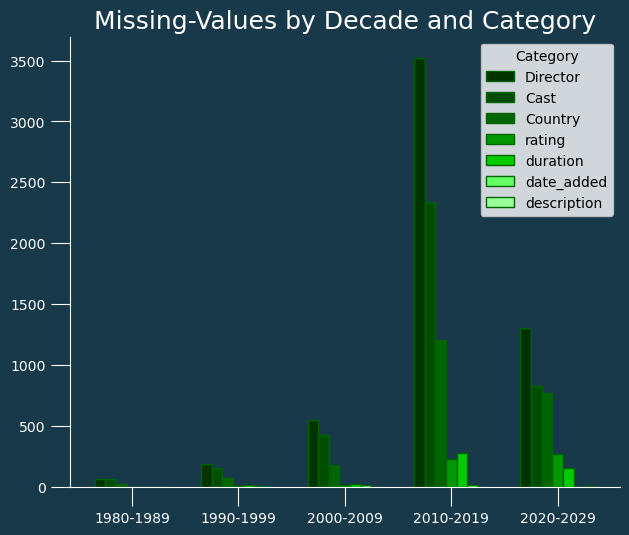

In [44]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0.1, 0.2, 0.55, 0.75]) 

# Define the width of each bar and space between groups
w = .10  # Width of bars

# # Create the plot
# fig, ax = plt.subplots(figsize=(20, 8))
# gs = GridSpec(1, 2, width_ratios=[4, 1])


# ax1 = fig.add_subplot(gs[0])
# Plot each column with a different color
# fig,ax1 = plt.subplots(figsize=(14,6))
ax1.bar([i - 3*w for i in x], missing_by_years['director'], width=w, color='#003300', label='Director', edgecolor='darkgreen')
ax1.bar([i - 2*w for i in x], missing_by_years['cast'], width=w, color='#004d00', label='Cast', edgecolor='darkgreen')
ax1.bar([i - w for i in x], missing_by_years['country'], width=w, color='#006400', label='Country', edgecolor='darkgreen')
ax1.bar(x, missing_by_years['rating'], width=w, color='#009900', label='rating', edgecolor='darkgreen')
ax1.bar([i + w for i in x], missing_by_years['duration'], width=w, color='#00cc00', label='duration', edgecolor='darkgreen')
ax1.bar([i + 2*w for i in x], missing_by_years['date_added'], width=w, color='#66ff66', label='date_added', edgecolor='darkgreen')
ax1.bar([i + 3*w for i in x], missing_by_years['description'], width=w, color='#99ff99', label='description', edgecolor='darkgreen')


# Customize the x-axis
ax1.set_xticks(x)
ax1.set_xticklabels(missing_by_years['decade'], color='white')  # Use decade labels from the data
ax1.set_title('Missing-Values by Decade and Category', size=18, color='white')
ax1.tick_params(axis='y', size=14, labelcolor='white', color='white')
ax1.tick_params(axis='x', size=14, labelcolor='white', color='white')


ax1.legend(title='Category')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
#facepatch
fig.patch.set_facecolor('#183949')
ax1.set_facecolor('#183949')


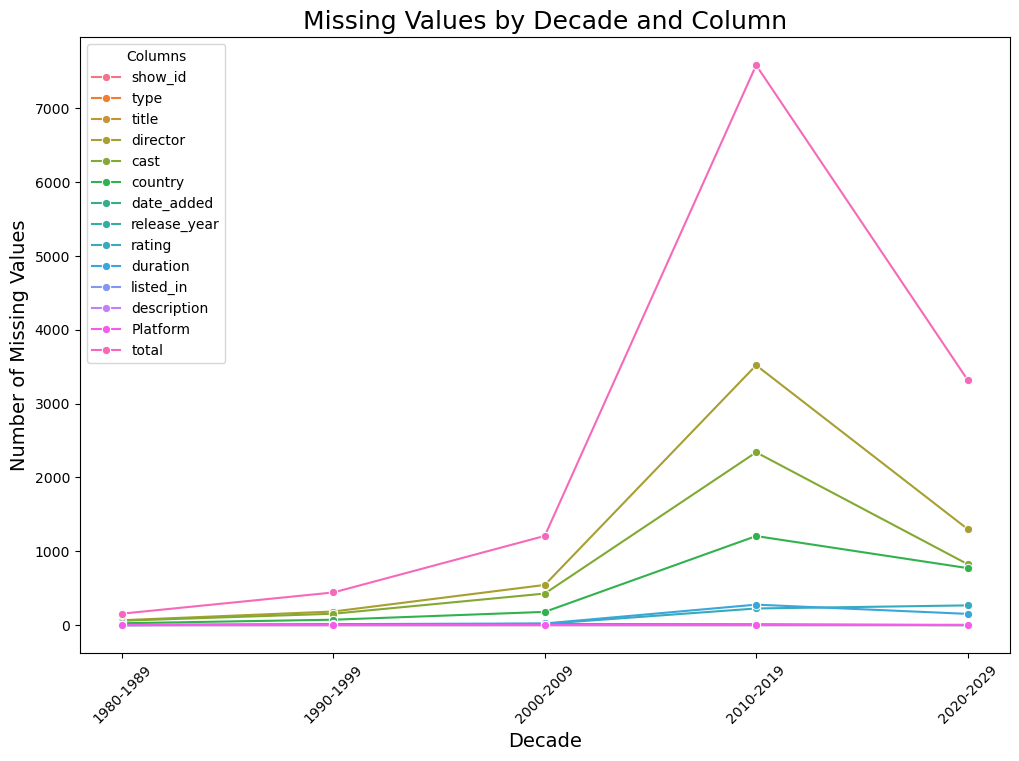

In [45]:
# Melt the DataFrame for easier plotting with Seaborn
missing_by_years_melted = missing_by_years.melt(id_vars=['decade'], var_name='Column', value_name='Missing Count')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='decade', y='Missing Count', hue='Column', data=missing_by_years_melted, marker='o', ax=ax)

# Title and labels
ax.set_title('Missing Values by Decade and Column', size=18)
ax.set_xlabel('Decade', size=14)
ax.set_ylabel('Number of Missing Values', size=14)
ax.legend(title='Columns')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


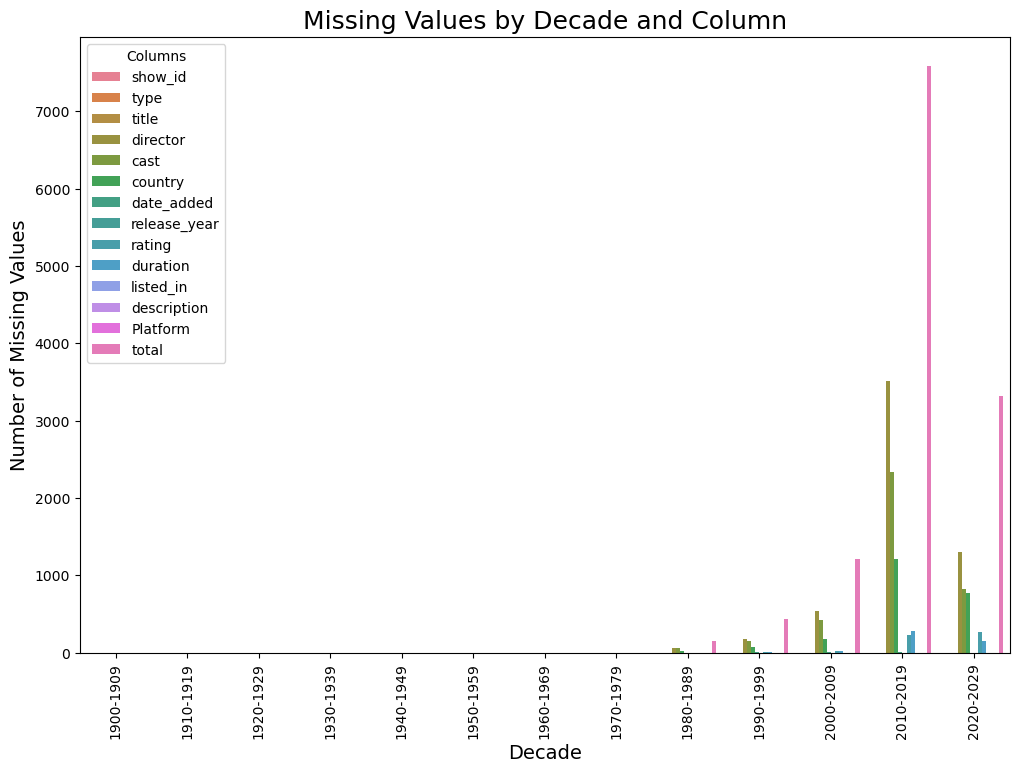

In [46]:
# Melt the DataFrame for easier plotting with Seaborn
missing_by_years_melted = missing_by_years.melt(id_vars=['decade'], var_name='Column', value_name='Missing Count')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='decade', y='Missing Count', hue='Column', data=missing_by_years_melted, ax=ax)

# Title and labels
ax.set_title('Missing Values by Decade and Column', size=18)
ax.set_xlabel('Decade', size=14)
ax.set_ylabel('Number of Missing Values', size=14)
ax.legend(title='Columns')

plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [47]:
mv_director = df_netflix[df_netflix['director'].isnull()]
mv_cast = df_netflix[df_netflix['cast'].isnull()]
mv_country = df_netflix[df_netflix['country'].isnull()]
mv_date_added = df_netflix[df_netflix['date_added'].isnull()]
mv_rating = df_netflix[df_netflix['rating'].isnull()]
mv_duration = df_netflix[df_netflix['duration'].isnull()]
mv_description = df_netflix[df_netflix['description'].isnull()]
mv_director['director'].unique()

array([nan], dtype=object)

In [48]:
missing_values = df_netflix[df_netflix.isnull().any(axis=1)]
missing_values


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...,Hulu
11876,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...,Hulu
11877,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...,Hulu
11878,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,Hulu


In [92]:
#retaining only missing values
only_mv = missing_values.applymap(lambda x: np.nan if pd.isna(x) else 0).copy()
only_mv.isna().mean()

/var/folders/98/8kv7cjxs5fx0f14r32z6xw6h0000gn/T/ipykernel_30360/2840844669.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  only_mv = missing_values.applymap(lambda x: np.nan if pd.isna(x) else 0).copy()


show_id         0.000000
type            0.000000
title           0.000000
director        0.871106
cast            0.595296
country         0.348809
date_added      0.005803
release_year    0.000000
rating          0.080024
duration        0.073610
listed_in       0.000000
description     0.000611
Platform        0.000000
dtype: float64

In [93]:
only_mv_cor = only_mv[['director','cast','country','date_added','rating','duration','description']]
only_mv_cor

,director,cast,country,date_added,rating,duration,description
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,NaN,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
11875,NaN,NaN,0.0,NaN,0.0,0.0,0.0
11876,NaN,NaN,0.0,NaN,0.0,0.0,0.0
11877,NaN,NaN,0.0,NaN,0.0,0.0,0.0
11878,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In [94]:
filling_1 = only_mv_cor.fillna(1)

In [95]:
mv_per = filling_1.mean()
mv_per*100

director       87.110568
cast           59.529627
country        34.880880
date_added      0.580330
rating          8.002443
duration        7.361026
description     0.061087
dtype: float64

In [96]:

nan_presence = only_mv_cor.isna().astype(int)
C = nan_presence.corr()

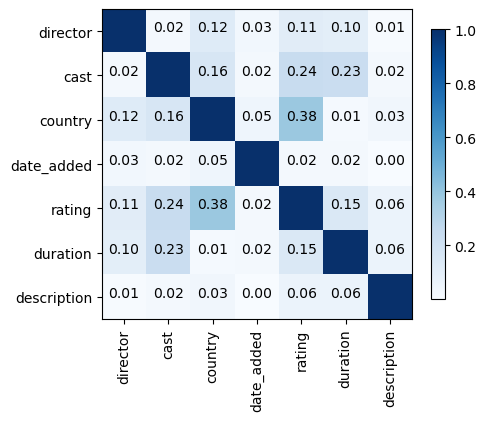

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

C = np.abs(C)

# Use imshow to display data as an image,with choice of color schemes
im = ax.imshow(C, cmap='Blues') #try to add vmin=0, 0.5, 0.7

# Add correlation as text to each box, with 2 decimal places
for i in range(7):
    for j in range(7):
        if i!=j:
            ax.text(i, j, f"{C.iloc[i,j]:.2f}", horizontalalignment='center')
        
ax.set_xticks(range(7))
ax.set_xticklabels(list(C.columns), rotation=90) #set the location and labels of x axis 
ax.set_yticks(range(7))
ax.set_yticklabels(list(C.columns)) #set the location and labels of y axis 

fig.colorbar(im, ax=ax, shrink=.7) #add color bar to indicate value-color map
plt.show()

In [98]:
df_missing = df_netflix.copy()
df_missing = pd.DataFrame(df_missing)

In [99]:
def get_decade(year):
    if pd.isnull(year):
        return (None, None)
    start_decade = (year // 10) * 10
    end_decade = start_decade + 9
    return (int(start_decade), int(end_decade))

df_new = pd.to_datetime(df_missing['date_added'], format='%B %d, %Y', errors='coerce')
df_new = df_missing

# Convert date strings to datetime
df_new['date_added'] = pd.to_datetime(df_new['date_added'], format='%B %d, %Y', errors='coerce')

# Extract the year and compute the decade
df_new['decade'] = df_new['date_added'].dt.year.apply(get_decade)


df_aftergourp_by = df_new.groupby('decade')['type'].count()
df_aftergourp_by


decade
(2000, 2009)      14
(2010, 2019)    6464
(2020, 2029)    5276
(None, None)     126
Name: type, dtype: int64

In [100]:
df_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform,decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,"(2020, 2029)"
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,"(2020, 2029)"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,"(2020, 2029)"
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,"(2020, 2029)"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,"(2020, 2029)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaT,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...,Hulu,"(None, None)"
11876,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaT,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...,Hulu,"(None, None)"
11877,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaT,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...,Hulu,"(None, None)"
11878,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaT,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,Hulu,"(None, None)"


In [101]:
df_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform,decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,"(2020, 2029)"
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,"(2020, 2029)"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,"(2020, 2029)"
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,"(2020, 2029)"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,"(2020, 2029)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaT,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...,Hulu,"(None, None)"
11876,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaT,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...,Hulu,"(None, None)"
11877,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaT,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...,Hulu,"(None, None)"
11878,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaT,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,Hulu,"(None, None)"
